In [ ]:
import pandas as pd

df = pd.read_csv("wine-clustering.csv")

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1337029.49294159,
 916379.1871539169,
 647326.0020260848,
 412303.8282508012,
 323223.24705426686,
 270954.9292415376,
 217887.37856033302]

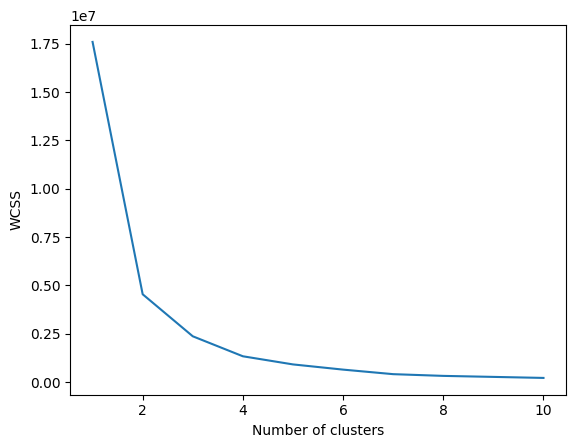

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph we can colclude that the curve gets flatten from n=3 to n=4. Hence the appropriate number of clusters should be 3.

In [ ]:
corr_mat = df.corr().abs()

In [ ]:
corr_mat.unstack().sort_values(ascending = False).drop_duplicates()

Alcohol          Alcohol            1.000000
Total_Phenols    Flavanoids         0.864564
OD280            Flavanoids         0.787194
                 Total_Phenols      0.699949
Proanthocyanins  Flavanoids         0.652692
                                      ...   
Magnesium        Malic_Acid         0.054575
Proanthocyanins  Color_Intensity    0.025250
Color_Intensity  Ash_Alcanity       0.018732
Proanthocyanins  Ash                0.009652
OD280            Ash                0.003911
Length: 79, dtype: float64

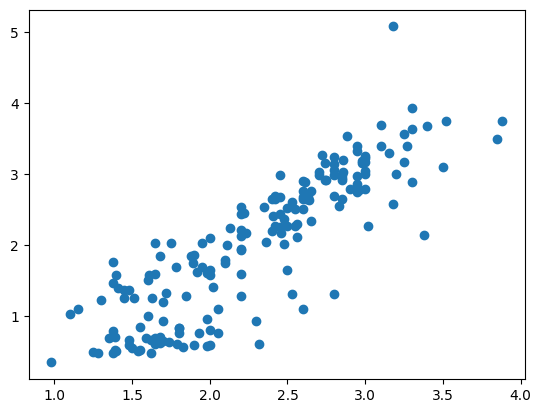

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Total_Phenols'], df['Flavanoids'])

plt.show()